# TP2 Statistiques
### Partie 1

In [1]:
# packages:

from os import path
import sys
import urllib
import zipfile

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
plt.style.use('seaborn')
sns.set(color_codes=True)

from sklearn import datasets, linear_model

### Q1

In [36]:
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/Galton.txt'
df_desc = pd.read_csv(url, sep='\t')
df_desc.head()
df_desc.count()
df_desc.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


* Ne comporte pas de points abérrants.

### Q2

In [37]:
# Conversion des inches en cm et arrondies
df_desc['Father'] = round(df_desc['Father'] * 2.54)
df_desc['Mother'] = round(df_desc['Mother'] * 2.54)
df_desc['Height'] = round(df_desc['Height'] * 2.54)
df_desc.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.0,170.0,M,186.0,4
1,1,199.0,170.0,F,176.0,4
2,1,199.0,170.0,F,175.0,4
3,1,199.0,170.0,F,175.0,4
4,2,192.0,169.0,M,187.0,4


* Conversion des inches en cm et valeurs arrondies.

In [38]:
# Compte des valeurs manquantes (VM)
cpt = 0
for el in df_desc:
    if (pd.isnull(el) == True):
        cpt = cpt + 1

print('Number of observations left: %s' % str(cpt))
df_desc.dropna(axis=1, how='all')

Number of observations left: 0


,Family,Father,Mother,Gender,Height,Kids
0,1,199.0,170.0,M,186.0,4
1,1,199.0,170.0,F,176.0,4
2,1,199.0,170.0,F,175.0,4
3,1,199.0,170.0,F,175.0,4
4,2,192.0,169.0,M,187.0,4
5,2,192.0,169.0,M,184.0,4
6,2,192.0,169.0,F,166.0,4
7,2,192.0,169.0,F,166.0,4
8,3,190.0,163.0,M,180.0,2
9,3,190.0,163.0,F,173.0,2


* Suppression des valeurs manquantes.

### Q3

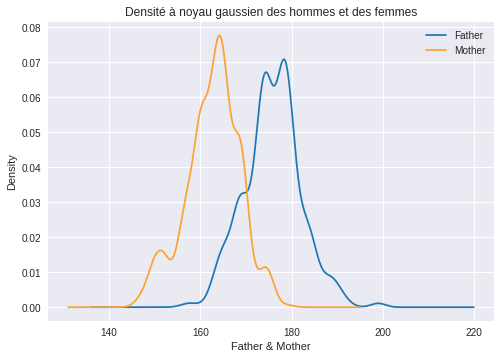

In [39]:
# Changer couler des axes
df_desc['Father'].plot.density(color='#1f77b4')
df_desc['Mother'].plot.density(color='#ffa233')
plt.xlabel('Father & Mother'), plt.ylabel('Density')
plt.title('Densité à noyau gaussien des hommes et des femmes')
plt.legend()

### Q4

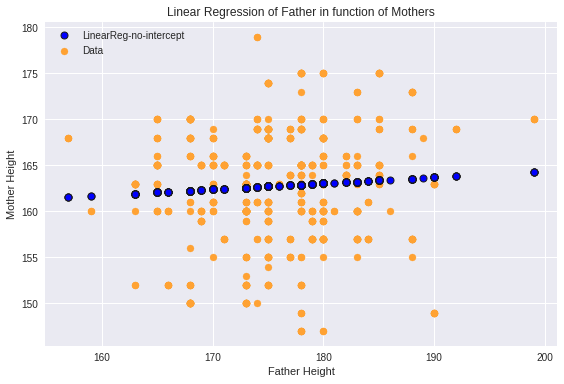

In [40]:
x = df_desc.Father.values.reshape(898, 1)
y = df_desc.Mother.values.reshape(898, 1)


regr = linear_model.LinearRegression()
regr.fit(x, y)

xlabels = "Father Height"
ylabels = "Mother Height"


plt.scatter(x, y, label="Data", color='#ffa233')
plt.plot(x, regr.predict(x), 'o', color='blue', linewidth=3,
         label="LinearReg-no-intercept", markeredgecolor='k', markeredgewidth=1)


plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title('Linear Regression of Father in function of Mothers')
plt.tight_layout()
plt.show()

### Q5

/home/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 103.,   47.,   32.,    7.,    5.,    2.,    0.,    0.,    0.,    1.]),
 array([   1. ,   23.4,   45.8,   68.2,   90.6,  113. ,  135.4,  157.8,
         180.2,  202.6,  225. ]),
 <a list of 10 Patch objects>)

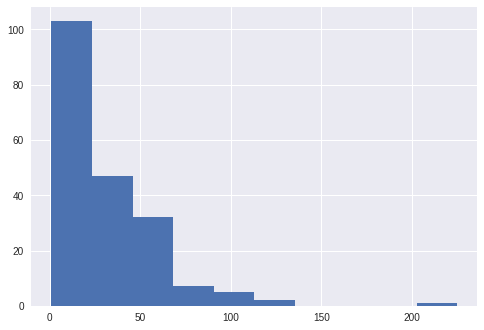

In [41]:
# groupby family
df_desc.set_index(['Family'], inplace=True)
df_desc1 = pd.groupby(df_desc['Kids'], by=[df_desc.index]).sum()
plt.hist(df_desc1)

* Histogramme du nombre d'enfants par famille

### Q6

In [42]:
col = df_desc.apply ( lambda row : (row["Father"] + 1.08 * row["Mother"]) / 2, axis = 1 ) 
df_desc["MidParents"] = col

* Création de la colonne MIdParents

### Q7

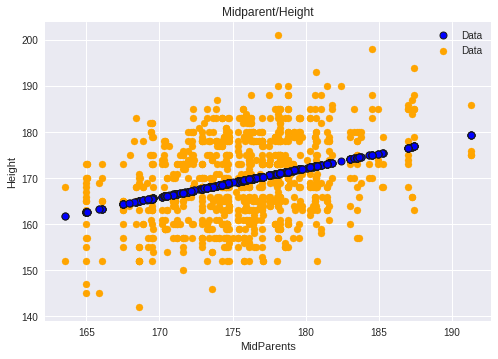

Intercept (Theta 0) =  [ 58.25591659]
Coef (Theta 1) =  [ 0.63309377]


In [43]:
x = df_desc.MidParents.values.reshape(898, 1)
y = df_desc.Height.values.reshape(898, 1)

regr = linear_model.LinearRegression(
    fit_intercept=True, n_jobs=1, normalize=True)
regr.fit(x, y)

fig1 = plt.figure()
plt.scatter(x, y, label="Data",  color='orange')
plt.plot(x, regr.predict(x), 'o', color='blue', linewidth=3,
         label="Data", markeredgecolor='k', markeredgewidth=1)

plt.xlabel('MidParents')
plt.ylabel('Height')
plt.title('Midparent/Height')
plt.legend()
plt.show()

Theta0 = regr.intercept_
Theta1 = regr.coef_[0]

print('Intercept (Theta 0) = ', regr.intercept_)
print('Coef (Theta 1) = ', regr.coef_[0])

In [44]:
Y_pred = regr.predict(x)

In [45]:
print('Vérification par le calcul :')
print(np.corrcoef(df_desc['MidParents'], df_desc['Height']))
print(np.corrcoef(df_desc['MidParents'], df_desc['Height'])[0,1])

Vérification par le calcul :
[[ 1.          0.31974756]
 [ 0.31974756  1.        ]]
0.319747563184


### Q8

In [46]:
y_pred = Theta0 + (Theta1 * df_desc['MidParents'])

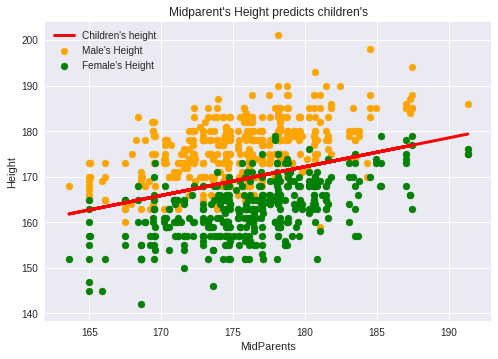

In [47]:
x = df_desc['MidParents']

y_male = df_desc['Height'][df_desc['Gender'] == 'M']
x_male = df_desc['MidParents'][df_desc['Gender'] == 'M']

y_female = df_desc['Height'][df_desc['Gender'] == 'F']
x_female = df_desc['MidParents'][df_desc['Gender'] == 'F']


plt.scatter(x_male, y_male, label="Male's Height",  color='orange')
plt.scatter(x_female, y_female, label="Female's Height",  color='green')

plt.plot(x, y_pred, color='red', linewidth=3,
         label="Children's height", markeredgecolor='k', markeredgewidth=1)

plt.xlabel('MidParents')
plt.ylabel('Height')
plt.title("Midparent's Height predicts children's")
plt.legend()
plt.show()

### Q9

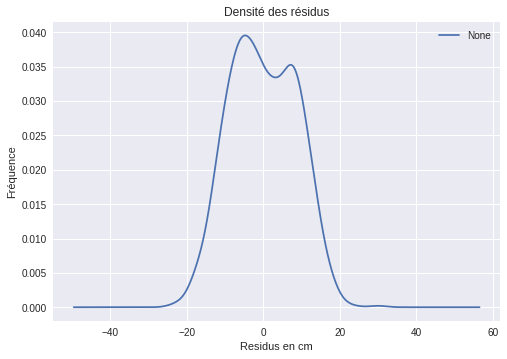

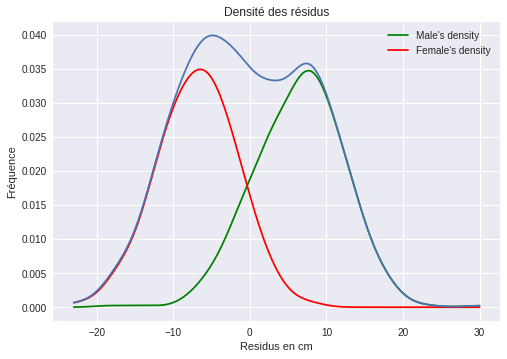

In [48]:
from sklearn import neighbors

residuals = df_desc['Height'] - y_pred
residuals.plot.density()


df_desc['residus'] = df_desc['Height'] - y_pred
df_desc.dropna(axis=1, how='all')


alpha_m = (df_desc[df_desc["Gender"] == 'M'].count() / 898).values[0]
alpha_f = 1 - alpha_m


dens_resi_g = (df_desc['Height'][(df_desc['Gender'] == 'M')
                                  ] - y_pred[(df_desc['Gender'] == 'M')])
dens_resi_f = (df_desc['Height'][(df_desc['Gender'] == 'F')
                                  ] - y_pred[(df_desc['Gender'] == 'F')])


kde_g = neighbors.kde.KernelDensity(kernel='gaussian', bandwidth=2).fit(
    dens_resi_g.values.reshape(-1, 1))

kde_f = neighbors.kde.KernelDensity(kernel='gaussian', bandwidth=2).fit(
    dens_resi_f.values.reshape(-1, 1))

kde_all = neighbors.kde.KernelDensity(kernel='gaussian', bandwidth=2).fit(
    residuals.values.reshape(-1, 1))


X_plot = np.linspace(min(dens_resi_f), max(dens_resi_g), 1000)

plt.title("Densité des résidus")
plt.xlabel("Residus en cm")
plt.ylabel("Fréquence")
plt.legend()

fig, ax = plt.subplots()

log_dens = kde_g.score_samples(X_plot.reshape(-1, 1))
plt.plot(X_plot, np.exp(log_dens) * alpha_m, label="Male's density",  color='green')

log_dens1 = kde_f.score_samples(X_plot.reshape(-1, 1))
plt.plot(X_plot, np.exp(log_dens1) * alpha_f, label="Female's density",  color='red')

log_dens2 = kde_all.score_samples(X_plot.reshape(-1, 1))
plt.plot(X_plot, np.exp(log_dens2))

plt.title("Densité des résidus")
plt.xlabel("Residus en cm")
plt.ylabel("Fréquence")
plt.legend()

plt.legend()
plt.show()

* Densité des hommes et des femmes.

### Q10

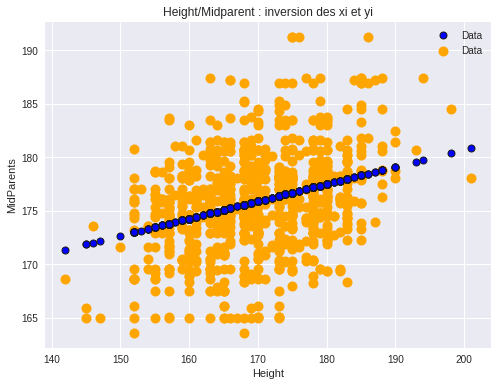

Intercept (Theta 0) = [ 148.43716045]
Coef (Theta 1) = [ 0.1614903]


In [49]:
x = df_desc.Height.values.reshape(898, 1)
y = df_desc.MidParents.values.reshape(898, 1)

regr = linear_model.LinearRegression(
    fit_intercept=True, n_jobs=1, normalize=False)
regr.fit(x, y)

fig1 = plt.figure(figsize=(8, 6))

plt.scatter(x, y, linewidth=3,
            label="Data",  color='orange')

plt.plot(x, regr.predict(x), 'o', color='blue', linewidth=3,
         label="Data", markeredgecolor='k', markeredgewidth=1)

plt.xlabel('Height')
plt.ylabel('MidParents')
plt.title("Height/Midparent : inversion des xi et yi")

plt.axis()
plt.legend()
plt.show()

Theta0 = regr.intercept_
Theta1 = regr.coef_[0]

print('Intercept (Theta 0) = %s' % regr.intercept_)
print('Coef (Theta 1) = %s' % regr.coef_[0])

In [50]:
alpha_0 = x.mean() + (y.mean() / x.mean()) * ((pow(x, 2).mean() /
                                               pow(x.mean(), 2)) / (pow(y, 2).mean() /
                                                                    pow(y.mean(), 2))) * (Theta0 - y.mean())
alpha_1 = ((pow(x, 2).mean() / pow(x.mean(), 2)) /
           (pow(y, 2).mean() / pow(y.mean(), 2))) * Theta1

print('alpha_0 = ', alpha_0)
print('alpha_1 = ', alpha_1)
print("Vérifié par le calcul.")

alpha_0 =  [ 141.11111715]
alpha_1 =  [ 0.16184511]
Vérifié par le calcul.


# Partie II
### Q11

In [51]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
df = pd.read_csv(url, sep=r"\s+", names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                                         "acceleration", "model year", "origin", "car name"])
df = df.dropna(axis=0)
df.count()
df_subset = df[0:10]

print(df_subset)

y = df_subset['mpg']
X = df_subset[["cylinders", "displacement", "horsepower",
               "weight", "acceleration", "model year"]]


yp = df['mpg']
Xp = df[["cylinders", "displacement", "horsepower",
         "weight", "acceleration", "model year"]]

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   
5  15.0        8.0         429.0       198.0  4341.0          10.0   
6  14.0        8.0         454.0       220.0  4354.0           9.0   
7  14.0        8.0         440.0       215.0  4312.0           8.5   
8  14.0        8.0         455.0       225.0  4425.0          10.0   
9  15.0        8.0         390.0       190.0  3850.0           8.5   

   model year  origin                   car name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0    

* Sont affichées les 10 lignes du dataset.
* NaN est le marqueur utilisé pour les données manquantes quand elles sont importées. Elle sont écrite NA si l'on parcourt à l'oeil nu le dataset.

### Q12

In [52]:
import statsmodels.api as sm
from pandas.core import datetools

X = sm.add_constant(X)  # let's add an intercept (beta_0) to our model

# Note the difference in argument order
model1 = sm.OLS(y, X).fit()
print(model1.params)# sm.OLS(output, input)
predictions1 = model1.predict(X)

# Print out the statistics
#model.summary()

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

#print(y)
#print(predictions)
lm.score(X, y)
print("Theta 1 = ", lm.coef_)
print("Theta 0 = ",lm.intercept_)

cylinders       0.041502
displacement    0.037682
horsepower     -0.086668
weight         -0.002094
acceleration   -0.068038
model year      0.363145
dtype: float64
Theta 1 =  [ 0.          0.03768195 -0.08666763 -0.00209436 -0.06803785  0.        ]
Theta 0 =  25.75213821


* Nous constatons que les coefficients de cylinders et year sont les plus grands donc les variables faisant consommer le plus.

### Q13

In [53]:
from sklearn import preprocessing

scaler_x = preprocessing.scale(Xp)
scaler_y = preprocessing.scale(yp)
Xarray = Xp.values

# print(scaler)
# print(Xarray)


# let's add an intercept (beta_0) to our model
scaler = sm.add_constant(scaler_x)

# Note the difference in argument order
model = sm.OLS(scaler_y, scaler_x).fit()  # sm.OLS(output, input)
coef_OLS = model.params
predictions = model.predict(scaler_x)

# Print out the statistics
model.summary()

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(scaler_x, scaler_y)


predictions2 = lm.predict(scaler_x)
# print(scaler_y.head(20))
# print(predictions)
lm.score(scaler_x, scaler_y)
vect_coef = lm.coef_
print(vect_coef)
print(lm.intercept_)


print('\n')
print('On voit que les deux variables les + significatives sont weight et model year')

[-0.07209066  0.10294695 -0.00193001 -0.73944399  0.03014184  0.3555674 ]
5.30249932075e-16


On voit que les deux variables les + significatives sont weight et model year


### Q14

In [54]:
yp = df['mpg']
scaler_y_normalized = preprocessing.scale(yp)

resi = (scaler_y - predictions) * (scaler_y - predictions)
square_resi = resi.sum()
print("Norme r² : ", square_resi)

n = 392
p = 6

square_resi_np = (square_resi / (n - p))
# print(square_resi_np)

# Matrice unitaire
unos = np.ones(392,)


test = square_resi +  (pow(predictions - (scaler_y_normalized.mean() * unos), 2)).sum()


test1 = pow(scaler_y_normalized - (scaler_y_normalized.mean() * unos), 2).sum()

print(test)
print(test1)
print('Calcul vérifié')

Norme r² :  74.7719266969
392.0
392.0
Calcul vérifié


### Q15

In [55]:
yp = df['mpg']
Xp = df[["cylinders", "displacement", "horsepower",
         "weight", "acceleration", "model year"]]


row_new_car = (np.asarray([1, 6, 225, 100, 3233, 15.4, 76]))

Xp = sm.add_constant(Xp, has_constant='add')

yi = sm.OLS(yp, Xp).fit().predict(row_new_car)
print('Prédiction de la consommation pour cette voiture : ' , yi)

Prédiction de la consommation pour cette voiture :  [ 21.77622018]


### Q16

In [61]:
from sklearn.preprocessing import PolynomialFeatures

yp = df['mpg']
Xp = df[["cylinders", "displacement", "horsepower",
         "weight", "acceleration", "model year"]]

p = PolynomialFeatures(degree=2, interaction_only=False,
                       include_bias=True).fit(Xp)
# print(p.get_feature_names(Xp.columns))

features = pd.DataFrame(p.transform(
    Xp), columns=p.get_feature_names(Xp.columns))

scaler_xp = preprocessing.scale(features)
scaler_yp = preprocessing.scale(yp)

res = sm.OLS(scaler_yp, scaler_xp).fit().params

coefs_origin = pd.Series(res[6:], index=features.columns[6:])
print(coefs_origin.sort_values(axis=0, ascending=False))


print('\n')
print('La variable la plus explicative est donc', coefs_origin.argmax())

displacement model year      5.604113
model year^2                 3.829164
acceleration model year      1.784930
cylinders horsepower         1.533248
cylinders weight             0.684714
displacement weight          0.667699
cylinders acceleration       0.625614
displacement horsepower      0.433615
weight^2                     0.405159
acceleration^2               0.255808
displacement^2               0.166733
weight acceleration          0.108940
horsepower acceleration     -0.306189
cylinders displacement      -0.378108
displacement acceleration   -0.422482
horsepower^2                -0.460769
horsepower model year       -0.622263
horsepower weight           -0.789112
cylinders^2                 -1.043594
cylinders model year        -2.081999
weight model year           -3.222055
model year                  -3.448479
dtype: float64


La variable la plus explicative est donc displacement model year


### Q17

In [57]:
df_dum = df[["cylinders", "displacement", "horsepower",
             "weight", "acceleration", "model year", "origin"]]
yp = df['mpg']

df_dum = pd.get_dummies(df_dum, columns=['origin'], drop_first=True)
scaler_xp = preprocessing.scale(df_dum)
scaler_yp = preprocessing.scale(yp)

df_dum.rename(columns={'origin_1.0': 'usa', 'origin_2.0': 'europe', 'origin_3.0': 'japan'}, inplace=True)

res = sm.OLS(scaler_yp, scaler_xp).fit().params

coefs_origin = pd.Series(res[6:], index=df_dum.columns[6:])
print(coefs_origin)

print(res)
print('\n')
print('Modèle sans constante.')
print('\n')
print("Le japon est l'origine la plus efficace")

europe    0.127755
japan     0.146831
dtype: float64
[-0.10702592  0.32148865 -0.08967354 -0.730277    0.02796084  0.36673412
  0.12775513  0.14683091]


Modèle sans constante.


Le japon est l'origine la plus efficace


### Q18

In [58]:
df_ex = df
brand = df_ex['car name'].str.split(' ')
car_brand = brand.str.get(0)

car_brand = car_brand.replace('toyouta', 'toyota').replace('capri', 'ford').replace('vw', 'volkswagen').replace('vokswagen', 'volkswagen').replace(
    'mercedes-benz', 'mercedes').replace('chevroelt', 'chevrolet').replace('chevy', 'chevrolet').replace('maxda', 'mazda')

df_ex1 = df_ex[["cylinders", "displacement", "horsepower",
                "weight", "acceleration", "model year"]]

frames = [df_ex1, car_brand]
result = pd.concat(frames, axis=1)

df_dum2 = result
yp = df['mpg']

df_dum2 = pd.get_dummies(df_dum2, columns=['car name'], drop_first=True)

scaler_xp = preprocessing.scale(df_dum2)
scaler_yp = preprocessing.scale(yp)

res = sm.OLS(scaler_yp, scaler_xp).fit().params


#val = car_brand.value_counts()

coefs_car_brand = pd.Series(res[6:], index=df_dum2.columns[6:])

print(coefs_car_brand.argmax(), ' = ', max(res))
print("Datsun est la marque la + efficace et c'est en accord avec la question précédante étant d'origine japonaise")

car name_datsun  =  0.353060420365
Datsun est la marque la + efficace et c'est en accord avec la question précédante étant d'origine japonaise


### Q19

In [59]:
Xp_svd = df[["cylinders", "displacement", "horsepower",
         "weight", "acceleration", "model year"]]
scaler_Xp_svd = preprocessing.scale(Xp_svd)


U, s, V = np.linalg.svd(Xp, full_matrices=False)
assert np.allclose(Xp, np.dot(U, np.dot(np.diag(s), V)))

H = np.dot(U, U.T)
Hp = np.dot(U.T, U)

# Symétrie
sym = np.allclose(H, H.T)
print("H est symétrique :", sym)

# Idempotence
idem = np.allclose(H, np.dot(H, H))
print("H = H² is", idem)

print("La matrice H est symétrique et idempotente c'est donc un projeté orthogonal.")

H est symétrique : True
H = H² is True
La matrice H est symétrique et idempotente c'est donc un projeté orthogonal.


### Q20

In [60]:
H_diag = np.diag(H)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
df = pd.read_csv(url, sep=r"\s+", names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                                         "acceleration", "model year", "origin", "car name"])
df = df.dropna(axis=0)

df_no_leviers = df

other = pd.DataFrame(H_diag)

df_final = df_no_leviers.join(other, lsuffix='leviers', rsuffix='dframe')
df_final = df_final.dropna(axis=0)
df_final.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                    "acceleration", "model year", "origin", "car name", "leviers"]
df_final.sort_values(by="leviers", ascending=False)
df_final.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,leviers
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.016664
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.016752
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.018234
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.020028
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.019484
